## Homework

### Dataset

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/datasets/agrigorev/dino-or-dragon).

In [2]:
import pandas as pd
import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation

The dataset contains around 1900 images of dinos and around 1900 images of dragons. 

The dataset contains separate folders for training and test sets. 

Let's look at some of the images:

Dino


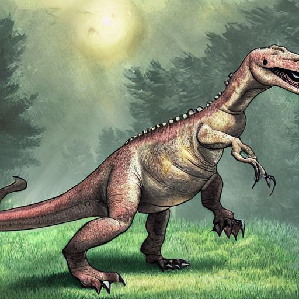

In [3]:
from tensorflow.keras.preprocessing.image import load_img

path = '../data/dino-dragon/train/dino'
name = '01d2e297-ae2b-41c0-833b-688f51ce5f22.jpg'
fullname = path + '/' + name

print('Dino')
load_img(fullname, target_size=(299, 299)) # Reshaped image

Dragon


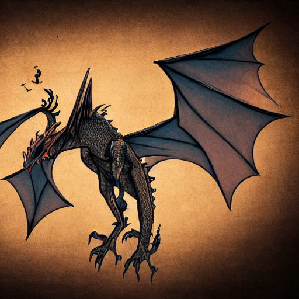

In [4]:
path = '../data/dino-dragon/train/dragon'
name = '00af6fd7-5484-4e59-b974-761a5c36a16e.jpg'
fullname = path + '/' + name

print('Dragon')
load_img(fullname, target_size=(299, 299)) # Reshaping image

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

The model needs to be developed with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(learning_rate=0.002, momentum=0.8)`

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- [X] `binary crossentropy`
- [ ] `focal loss`
- [ ] `mean squared error`
- [ ] `categorical crossentropy`

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`

In [6]:
model = Sequential([
    keras.layers.Conv2D(filters=32, 
                        kernel_size=(3, 3), 
                        activation='relu', 
                        input_shape=(150, 150, 3)), # Convolutional layer
    keras.layers.MaxPooling2D(pool_size=(2,2)), # MaxPooling
    keras.layers.Flatten(), # Flattening the results
    keras.layers.Dense(64, activation='relu'), # Dense layer with ReLU activation
    keras.layers.Dense(1, activation='sigmoid'), # Output layer with sigmoid activation
])

# Setting optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

# Compiling the model
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=["accuracy"])

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that. 

- [ ] 9215873
- [X] 11215873
- [ ] 14215873
- [ ] 19215873

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    test_data=test_generator
)
```

### Question 3

What is the median of training accuracy for all the epochs for this model?

- [ ] 0.40
- [ ] 0.60
- [X] 0.90
- [ ] 0.20

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- [X] 0.11
- [ ] 0.66
- [ ] 0.99
- [ ] 0.33

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image and batch sizes
image_size = (150, 150)
batch_size = 20

# Create train dataset
train_datagen = ImageDataGenerator(rescale=1./255)

print("Train set:")
train_generator = train_datagen.flow_from_directory(
    "../data/dino-dragon/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

# Create test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

print("\nTest set:")
test_generator = test_datagen.flow_from_directory(
    "../data/dino-dragon/test",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Train set:
Found 1594 images belonging to 2 classes.

Test set:
Found 394 images belonging to 2 classes.


In [10]:
epochs = 10

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

Epoch 1/10
80/80 [==============================] - 10s 119ms/step - loss: 0.6036 - accuracy: 0.7089 - val_loss: 0.5701 - val_accuracy: 0.6421
Epoch 2/10
80/80 [==============================] - 8s 106ms/step - loss: 0.4661 - accuracy: 0.7955 - val_loss: 0.4897 - val_accuracy: 0.7437
Epoch 3/10
80/80 [==============================] - 8s 106ms/step - loss: 0.3780 - accuracy: 0.8519 - val_loss: 0.3528 - val_accuracy: 0.8655
Epoch 4/10
80/80 [==============================] - 8s 106ms/step - loss: 0.3234 - accuracy: 0.8758 - val_loss: 0.3273 - val_accuracy: 0.8553
Epoch 5/10
80/80 [==============================] - 8s 105ms/step - loss: 0.2938 - accuracy: 0.8846 - val_loss: 0.3706 - val_accuracy: 0.8325
Epoch 6/10
80/80 [==============================] - 8s 106ms/step - loss: 0.2587 - accuracy: 0.9021 - val_loss: 0.3247 - val_accuracy: 0.8477
Epoch 7/10
80/80 [==============================] - 8s 105ms/step - loss: 0.2318 - accuracy: 0.9141 - val_loss: 0.2829 - val_accuracy: 0.8706
Epoch

In [11]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

print("Median of training accuracy: ", np.round(np.median(train_acc),2))
print("Standard deviation of training loss: ", np.round(np.std(train_loss),2))

Median of training accuracy:  0.89
Standard deviation of training loss:  0.13


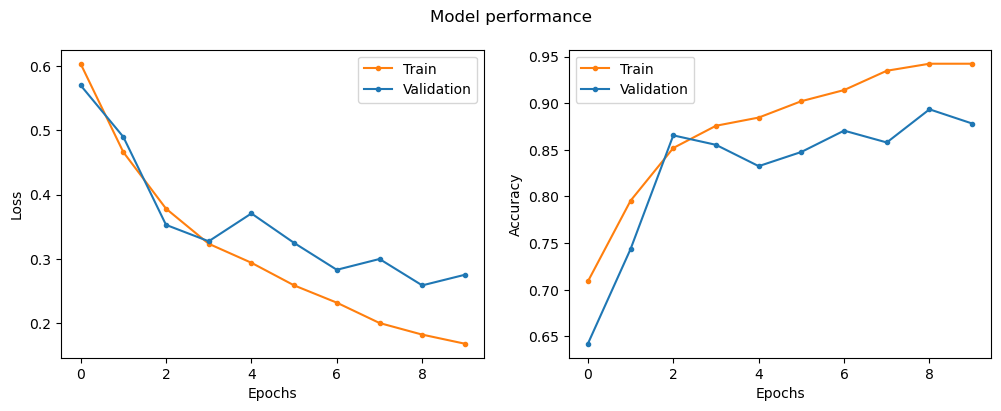

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(range(epochs), train_loss, '.-', color='tab:orange', label='Train')
ax1.plot(range(epochs), val_loss, '.-', color='tab:blue', label='Validation')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(range(epochs), train_acc, '.-', color='tab:orange', label='Train')
ax2.plot(range(epochs), val_acc, '.-', color='tab:blue', label='Validation')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

fig.suptitle("Model performance")

plt.show()

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- [ ] 0.15
- [ ] 0.77
- [X] 0.37
- [ ] 0.97

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

- [X] 0.84
- [ ] 0.54
- [ ] 0.44
- [ ] 0.24


In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

print("Train set augmented:")
train_generator_aug = train_datagen.flow_from_directory(
    "../data/dino-dragon/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Train set augmented:
Found 1594 images belonging to 2 classes.


In [16]:
epochs = 10

history = model.fit(
    train_generator_aug,
    epochs=epochs,
    validation_data=test_generator
)

Epoch 1/10
80/80 [==============================] - 15s 188ms/step - loss: 0.4121 - accuracy: 0.8275 - val_loss: 0.2977 - val_accuracy: 0.8629
Epoch 2/10
80/80 [==============================] - 15s 187ms/step - loss: 0.4093 - accuracy: 0.8049 - val_loss: 0.3441 - val_accuracy: 0.8350
Epoch 3/10
80/80 [==============================] - 15s 189ms/step - loss: 0.3783 - accuracy: 0.8444 - val_loss: 0.3373 - val_accuracy: 0.8503
Epoch 4/10
80/80 [==============================] - 15s 189ms/step - loss: 0.3546 - accuracy: 0.8513 - val_loss: 0.2897 - val_accuracy: 0.8858
Epoch 5/10
80/80 [==============================] - 15s 187ms/step - loss: 0.3579 - accuracy: 0.8432 - val_loss: 0.3767 - val_accuracy: 0.8249
Epoch 6/10
80/80 [==============================] - 15s 188ms/step - loss: 0.3388 - accuracy: 0.8513 - val_loss: 0.3009 - val_accuracy: 0.8629
Epoch 7/10
80/80 [==============================] - 15s 187ms/step - loss: 0.3451 - accuracy: 0.8570 - val_loss: 0.4322 - val_accuracy: 0.8071

In [17]:
train_aug_acc = history.history['accuracy']
val_aug_acc = history.history['val_accuracy']

train_aug_loss = history.history['loss']
val_aug_loss = history.history['val_loss']

print("Mean of test loss: ", np.round(np.mean(val_aug_loss),2))
print("Mean of test accuracy for the last 5 epochs: ", np.round(np.mean(val_aug_acc[5:]),2))

Mean of test loss:  0.36
Mean of test accuracy for the last 5 epochs:  0.82


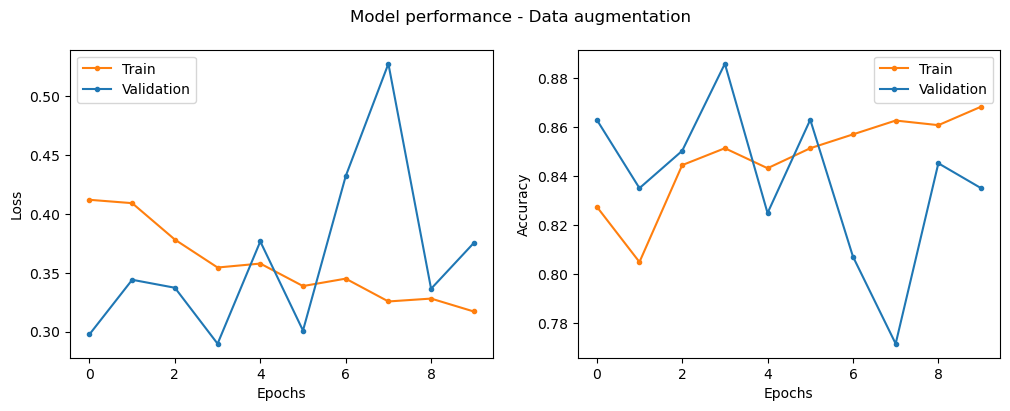

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(range(epochs), train_aug_loss, '.-', color='tab:orange', label='Train')
ax1.plot(range(epochs), val_aug_loss, '.-', color='tab:blue', label='Validation')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(range(epochs), train_aug_acc, '.-', color='tab:orange', label='Train')
ax2.plot(range(epochs), val_aug_acc, '.-', color='tab:blue', label='Validation')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

fig.suptitle("Model performance - Data augmentation")

plt.show()